<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Линейная-Регрессия" data-toc-modified-id="Линейная-Регрессия-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Линейная Регрессия</a></span><ul class="toc-item"><li><span><a href="#Линейная-зависимость" data-toc-modified-id="Линейная-зависимость-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Линейная зависимость</a></span></li><li><span><a href="#Нелинейная-зависимость" data-toc-modified-id="Нелинейная-зависимость-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Нелинейная зависимость</a></span></li><li><span><a href="#Полиномиальные-признаки" data-toc-modified-id="Полиномиальные-признаки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Полиномиальные признаки</a></span></li><li><span><a href="#Метод-опорных-векторов-(SVM)" data-toc-modified-id="Метод-опорных-векторов-(SVM)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Метод опорных векторов (SVM)</a></span></li></ul></li><li><span><a href="#Метрики-качества-задачи-регрессии-(MAE,-MSE,-RMSE,-R^2,-MAPE)" data-toc-modified-id="Метрики-качества-задачи-регрессии-(MAE,-MSE,-RMSE,-R^2,-MAPE)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Метрики качества задачи регрессии (MAE, MSE, RMSE, R^2, MAPE)</a></span><ul class="toc-item"><li><span><a href="#MSE,-RMSE" data-toc-modified-id="MSE,-RMSE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>MSE, RMSE</a></span></li><li><span><a href="#MAE,-MAPE" data-toc-modified-id="MAE,-MAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>MAE, MAPE</a></span></li><li><span><a href="#R^2---коэффициент-детерминации" data-toc-modified-id="R^2---коэффициент-детерминации-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>R^2 - коэффициент детерминации</a></span></li></ul></li></ul></div>

# Загрузка библиотек 

In [1]:
import warnings
import random
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_circles, make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

rcParams['figure.figsize'] = (8,8)
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
factor = 1
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi*factor

def generate_nonlinear_regression(n_sample=100):
    rng = np.random.RandomState(0)
    data_max, data_min = 1.4, -1.4
    len_data = (data_max - data_min)
    data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
    noise = rng.randn(n_sample) * .3
    target = data ** 3 - 0.5 * data ** 2 + noise
    return data, target

def show_coef(names, coef, positive=False):
    tmp_df = pd.Series(index=names, data=coef).sort_values(ascending=False)
    if positive:
        sns.barplot(x=abs(tmp_df.values), y=tmp_df.index)
    else:
        sns.barplot(x=tmp_df.values, y=tmp_df.index)
    plt.tight_layout
    plt.show()

# Линейная Регрессия

## Линейная зависимость

In [37]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [4]:
df = sns.load_dataset('penguins')
df = df[['flipper_length_mm', 'body_mass_g']].dropna()
df.head()

,flipper_length_mm,body_mass_g
0,181.00,3750.00
1,186.00,3800.00
2,195.00,3250.00
4,193.00,3450.00
5,190.00,3650.00


In [5]:
x = df['flipper_length_mm']
y = df['body_mass_g']

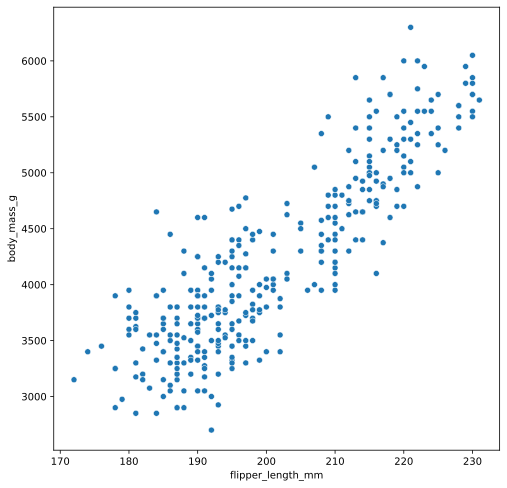

In [6]:
_ = sns.scatterplot(x=x, y=y)

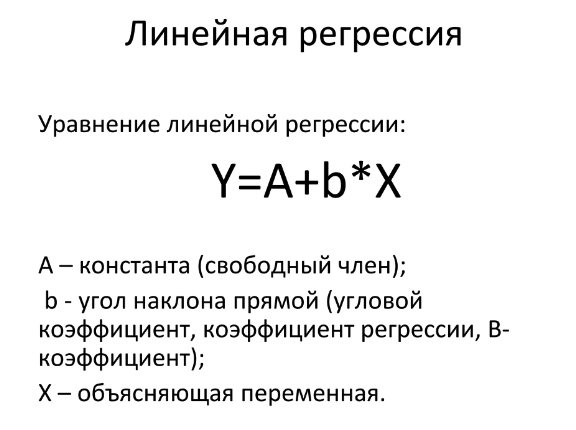

In [7]:
# Напишем функцию линейной регрессии

def linear_model_flipper_mass(flipper_length, weight_flipper_length,
                              intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

flipper_length_range = np.linspace(x.min(), x.max(), num=300)
flipper_length_range[:10]

array([172.        , 172.19732441, 172.39464883, 172.59197324,
       172.78929766, 172.98662207, 173.18394649, 173.3812709 ,
       173.57859532, 173.77591973])

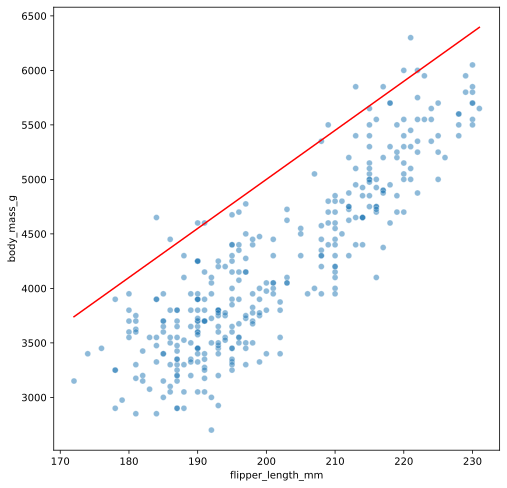

In [8]:
# Попробуем подобрать коэфициенты

weight_flipper_length = 45
intercept_body_mass = -4000

predicted_body_mass = linear_model_flipper_mass(flipper_length_range, weight_flipper_length, intercept_body_mass)

_ = sns.scatterplot(x=x, y=y, alpha=0.5)
_ = sns.lineplot(flipper_length_range, predicted_body_mass, color='r')

In [9]:
# посчитаем ошибку предсказания MAE

from sklearn.metrics import mean_absolute_error

predicted_body_mass = linear_model_flipper_mass(x, weight_flipper_length, intercept_body_mass)
mean_absolute_error(y, predicted_body_mass).round(2)

847.7

In [10]:
# Обучим модель линейной регрессии

from sklearn.linear_model import LinearRegression

x = df[['flipper_length_mm']]
y = df[['body_mass_g']]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [11]:
# Посмотрим коэфициенты модели y = a*x + b

print(f'a={model.coef_[0]}, b={model.intercept_}')

a=[49.68556641], b=[-5780.83135808]


In [12]:
weight_flipper_length = model.coef_.item()
intercept_body_mass = model.intercept_.item()

predicted_body_mass = linear_model_flipper_mass(flipper_length_range, weight_flipper_length, intercept_body_mass)

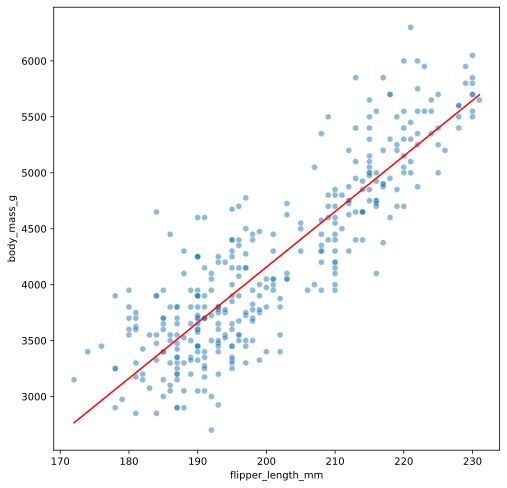

In [13]:
_ = sns.scatterplot(x=x['flipper_length_mm'], y=y['body_mass_g'], alpha=0.5)
_ = sns.lineplot(flipper_length_range, predicted_body_mass, color='r')

In [14]:
# посчитаем ошибку предсказания MAE
predicted_body_mass = model.predict(x)
mean_absolute_error(y, predicted_body_mass).round(2)

313.0

## Нелинейная зависимость

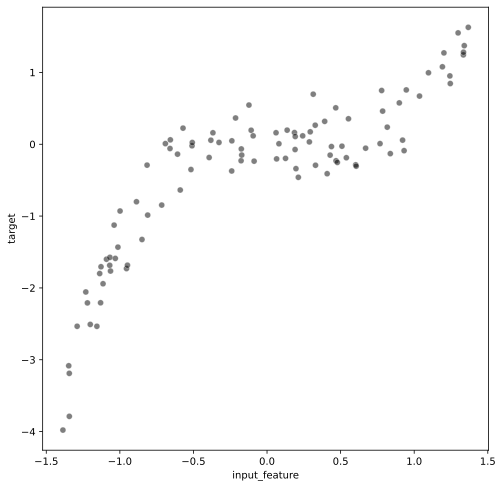

In [15]:
# Генерируем нелинейную зависимость

data, target = generate_nonlinear_regression()

full_data = pd.DataFrame({"input_feature": data, "target": target})

_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

In [16]:
data.shape

(100,)

In [17]:
# В sklearn X должен быть 2D массивом - (n_samples, n_features)

data = data.reshape((-1, 1))
data.shape

(100, 1)

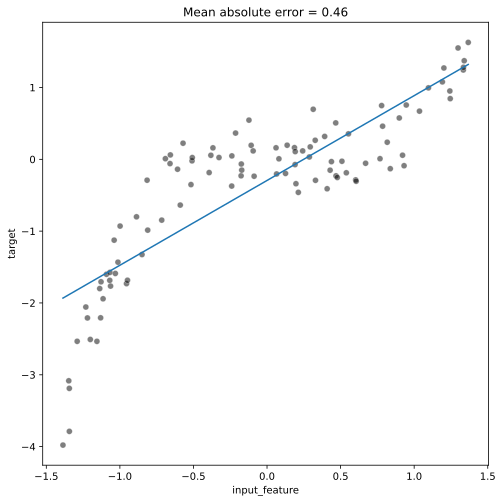

In [18]:
model = LinearRegression()
model.fit(data, target)
predicted = model.predict(data)

mae = mean_absolute_error(target, predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, predicted)
_ = ax.set_title(f"Mean absolute error = {mae:.2f}")

In [19]:
# Посмотрим на коэффиценты 

print(f"a={model.coef_[0]:.2f}, "
      f"b={model.intercept_:.2f}")

a=1.18, b=-0.29


## Полиномиальные признаки

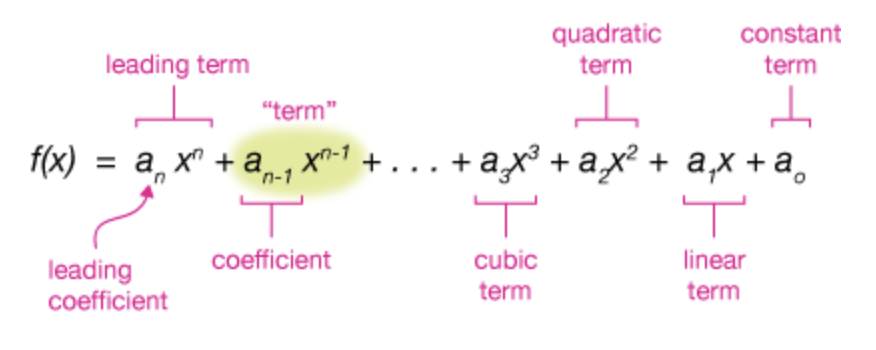

In [20]:
from sklearn.preprocessing import PolynomialFeatures

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]

In [21]:
data[:2]

array([[-1.38685267],
       [-1.34738856]])

In [22]:
poly = PolynomialFeatures(degree=3)
poly_data = poly.fit_transform(data)


In [23]:
poly_data[:2,:]

array([[ 1.        , -1.38685267,  1.92336032, -2.66741739],
       [ 1.        , -1.34738856,  1.81545593, -2.44612455]])

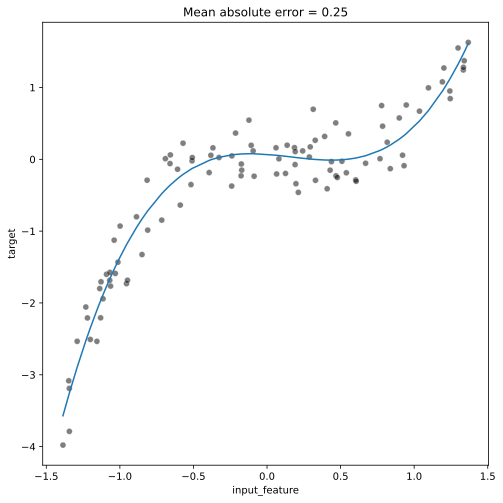

In [24]:
model = LinearRegression()
model.fit(poly_data, target)
predicted = model.predict(poly_data)

mae = mean_absolute_error(target, predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, predicted)
_ = ax.set_title(f"Mean absolute error = {mae:.2f}")

## Метод опорных векторов (SVM) 

Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве. https://scikit-learn.org/stable/modules/svm.html

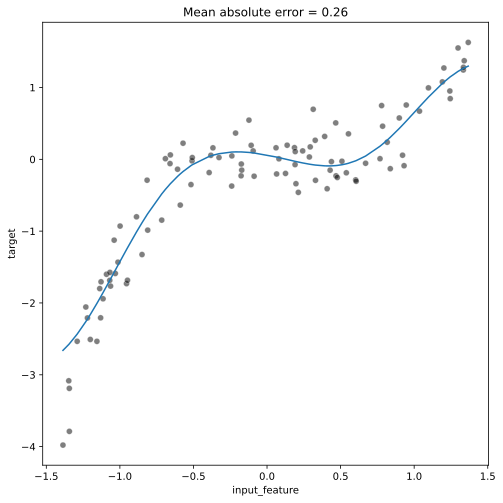

In [25]:
from sklearn.svm import SVR

svr = SVR() #linear
svr.fit(data, target)
predicted = svr.predict(data)

mae = mean_absolute_error(target, predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, predicted)
_ = ax.set_title(f"Mean absolute error = {mae:.2f}")

# Метрики качества задачи регрессии (MAE, MSE, RMSE, R^2, MAPE)

In [26]:
import warnings
warnings.filterwarnings('ignore')

import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets import make_circles, make_classification, make_regression

from sklearn.model_selection import train_test_split

In [27]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

rcParams['figure.figsize'] = 6,6
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
factor = 1
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi*factor

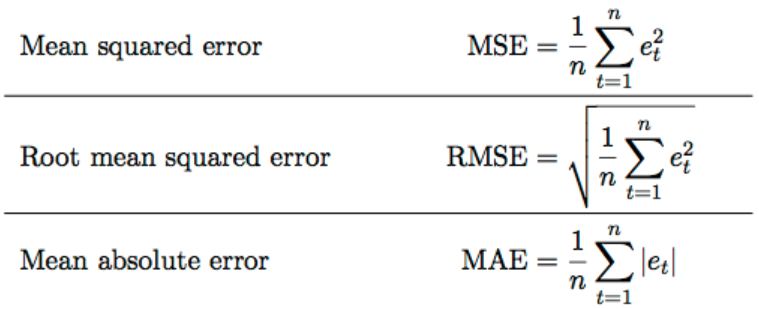

## MSE, RMSE

In [28]:
df = sns.load_dataset('mpg')
df = df.dropna()
df = df.drop(columns=['origin', 'name'])
df.head()

X = df.drop(columns=['mpg'])
y = df.mpg

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(train_X, train_y)

preds = model.predict(test_X)

from sklearn.metrics import mean_squared_error

print(f'MSE = {mean_squared_error(test_y, preds):.2f}')

print(f'RMSE = {mean_squared_error(test_y, preds, squared=False):.2f}')

model.score(test_X, test_y)

MSE = 10.50
RMSE = 3.24


0.7942349075428586

## MAE, MAPE

MAE = 2.50
MAPE = 12.29%


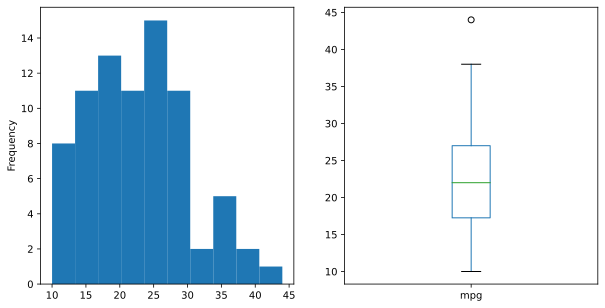

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print(f'MAE = {mean_absolute_error(test_y, preds):.2f}')

print(f'MAPE = {mean_absolute_percentage_error(test_y, preds):.2%}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5) )
test_y.plot(kind='hist', ax=axes[0])
test_y.plot(kind='box', ax=axes[1])
plt.show()

In [30]:
df = sns.load_dataset('mpg')
df = df.dropna()
df = df.drop(columns=['origin', 'name'])

X = df.drop(columns=['mpg'])
y = df.mpg

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

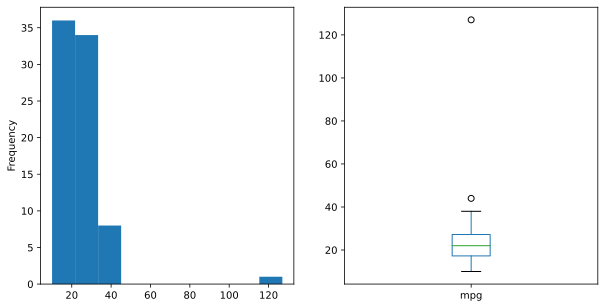

MAE = 3.77
MAPE = 13.20%
RMSE = 11.97


In [31]:
test_y.iloc[-1] = test_y.iloc[-1]+100


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5) )
test_y.plot(kind='hist', ax=axes[0])
test_y.plot(kind='box', ax=axes[1])
plt.show()

model = LinearRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)

print(f'MAE = {mean_absolute_error(test_y, preds):.2f}')
print(f'MAPE = {mean_absolute_percentage_error(test_y, preds):.2%}')
print(f'RMSE = {mean_squared_error(test_y, preds, squared=False):.2f}')

## R^2 - коэффициент детерминации

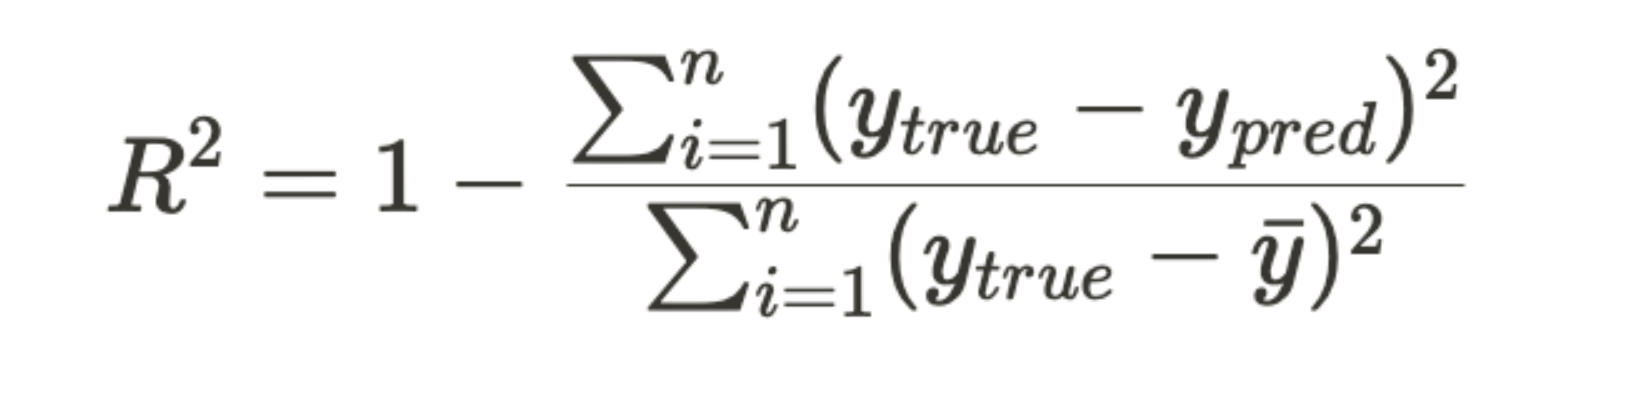

In [32]:
df = sns.load_dataset('mpg')
df = df.dropna()
df = df.drop(columns=['origin', 'name'])

In [33]:
X = df.drop(columns=['mpg'])
y = df.mpg
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LinearRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)

In [35]:
from sklearn.metrics import r2_score

print(f'R2 = {r2_score(test_y, preds):.2f}')
print(f'Variance = {test_y.var():.2f}')
print(f'MSE = {mean_squared_error(test_y, preds):.2f}')

R2 = 0.79
Variance = 51.69
MSE = 10.50


In [36]:
1-mean_squared_error(test_y, preds)/test_y.var()

0.7968395289663668